# Italy COVID-19 Data Analysis

In this data analysis, we'll be using the datasets file `italy-covid-daywise.txt` which contains daywise Covid-19 data for Italy in the following format:

```
date,new_cases,new_deaths,new_tests
2020-04-21,2256.0,454.0,28095.0
2020-04-22,2729.0,534.0,44248.0
2020-04-23,3370.0,437.0,37083.0
2020-04-24,2646.0,464.0,95273.0
2020-04-25,3021.0,420.0,38676.0
2020-04-26,2357.0,415.0,24113.0
2020-04-27,2324.0,260.0,26678.0
2020-04-28,1739.0,333.0,37554.0
...
```

This format of storing data is known as *comma separated values* or CSV. 

In [84]:
#importing the required libraries
import pandas as pd
from urllib.request import urlretrieve
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import jovian


## Retreiving the Data 

In [53]:
covid_df = pd.read_csv('datasets/italy-covid-daywise.csv')

In [4]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


## Analyzing the Data

Let's try to answer some questions about our data.

**Q1: What is the total number of reported cases and deaths related to Covid-19 in Italy?**


In [15]:
#total number of reported cases 
total_cases = covid_df.new_cases.sum()
total_cases

271515.0

In [16]:
#total number of reported deaths
total_deaths = covid_df.new_deaths.sum()
total_deaths

35497.0

In [17]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


**Q2: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [12]:
#overall death rate
death_rate = total_deaths / total_cases 
death_rate

0.13073679170579894

In [22]:
print('The overall reported death rate in Italy is {:.2f} %.' .format(death_rate * 100))

The overall reported death rate in Italy is 13.07 %.


**Q3: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were being reported.**


In [38]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

print("The overall number of texts conducted is {}" .format(int(total_tests)))

The overall number of texts conducted is 5214766


**Q4: What fraction of test returned a postive result?**

In [44]:
positive_rate = total_cases / total_tests
print("{:.2f} % of the tests in Italy led to a positive diagonis." .format(positive_rate * 100))

5.21 % of the tests in Italy led to a positive diagonis.


In [79]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


## Quering and Sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to chech which rows satisfy this criterion.

In [81]:
high_new_cases = covid_df.new_cases > 1000

In [97]:
high_new_cases.sample(10)

242     True
234    False
214    False
158    False
121     True
201    False
198    False
51     False
85      True
130     True
Name: new_cases, dtype: bool

The boolean expression returns a series containing `True` and `False` boolean values. This series can be used to filter out just those rows where the value in the series is `True`. The result is data frame with a subset of rows from the original.

In [1]:
covid_df[high_new_cases]

NameError: name 'covid_df' is not defined

We can also formulate more complex queries that involve mutiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall `positive_rate`.

In [90]:
positive_rate

0.05206657403227681

In [92]:
high_ratio_df = covid_df[covid_df.new_cases > positive_rate]

In [96]:
high_ratio_df.sample(10)

,date,new_cases,new_deaths,new_tests
154,2020-06-02,178.0,60.0,25628.0
136,2020-05-15,992.0,262.0,39027.0
115,2020-04-24,2646.0,464.0,95273.0
182,2020-06-30,126.0,6.0,28471.0
187,2020-07-05,235.0,21.0,21166.0
234,2020-08-21,840.0,6.0,44943.0
222,2020-08-09,347.0,13.0,22773.0
59,2020-02-28,250.0,5.0,NaN
137,2020-05-16,789.0,242.0,40657.0
99,2020-04-08,3039.0,604.0,NaN


Performing operations on multiple columns results in a new series.

In [99]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [101]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests,positive_rate
185,2020-07-03,201.0,30.0,25680.0,0.007827
123,2020-05-02,1965.0,269.0,31231.0,0.062918
169,2020-06-17,210.0,34.0,33957.0,0.006184
135,2020-05-14,888.0,195.0,41131.0,0.021590
218,2020-08-05,190.0,5.0,29739.0,0.006389
40,2020-02-09,0.0,0.0,NaN,NaN
129,2020-05-08,1401.0,274.0,45428.0,0.030840
102,2020-04-11,3951.0,570.0,NaN,NaN
108,2020-04-17,3786.0,525.0,NaN,NaN
45,2020-02-14,0.0,0.0,NaN,NaN


In [102]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [104]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


## Sorting rows using column values

Let's sort to identify the days with the highest number of cases, then chain it with the head method to get the 10 days with the most cases.

In [105]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [106]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


It appears that daily deaths hit a peak just about week after the peak in the daily new cases.

Let's also look at the days with the least number of cases. We might expect to see the first few days of the year in this list.

In [110]:
covid_df.sort_values('new_cases', ascending=True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


Seems like the count of new cases on June 20th was `-148`, a negative number! Not something we might have expected, but that's the nature of real world data. It could simply be a data entry error, or it's possible that the government may have issued a correction to account for miscounting in the past. 

In [112]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


If this was indeed a data entry error, we can use one of the following approaches for dealing with the missing or faulty value:
1. Replace it with `0`.
2. Repalce it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely

Which approach you pick requires some context about the data and the problem. In this case, since we are dealing data ordered by date, we can pick approach 3. 

The `.at` method can be used to modify a specific value within the data frame.

In [116]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[172, 'new_cases'])/2

In [117]:
covid_df.at[172, 'new_cases']

128.5

## Working with Dates

While we have looked at overall numbers for the cases, tests, positive rate etc., it would be also be useful to study these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides many utilities for working with dates.

In [119]:
covid_df.date.head()

0    2019-12-31
1    2020-01-01
2    2020-01-02
3    2020-01-03
4    2020-01-04
Name: date, dtype: object

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [121]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [122]:
covid_df.date.head()

0   2019-12-31
1   2020-01-01
2   2020-01-02
3   2020-01-03
4   2020-01-04
Name: date, dtype: datetime64[ns]

You can see that it now has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class ([learn more here](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html))

In [7]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [127]:
covid_df.head(10)

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
5,2020-01-05,0.0,0.0,NaN,2020,1,5,6
6,2020-01-06,0.0,0.0,NaN,2020,1,6,0
7,2020-01-07,0.0,0.0,NaN,2020,1,7,1
8,2020-01-08,0.0,0.0,NaN,2020,1,8,2
9,2020-01-09,0.0,0.0,NaN,2020,1,9,3


Let's check the overall metrics for the month of May. We can query the rows for May, choose a subset of colums that we want to aggregate, and use the `sum` method of the data frame to get the sum of values in each chosen column.

In [128]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregrated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

#Get the column-wise sum
covid_may_total = covid_df_may_metrics.sum()

In [129]:
covid_may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Here's another example, let's check if the number of cases reported on Sundays is higer than the average number of cases reported every day. This time, we might wan to aggregate using the `.mean` method.

In [5]:
# Overall average
covid_df.new_cases.mean()

1094.8185483870968

In [8]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

It seems like more cases were reported on Sundays compared to other days.


## Grouping and Aggregration

As a next step, we might want to summarize the daywise data and create a new dataframe with month-wise data. This is where the `groupby` funtion is useful. Along with a grouping, we need to specify a way to aggregate the data for each group.

In [10]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [11]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


The result is a new data frame, which uses unique values from the column passed to `groupby` as the index. Grouping and aggregation is a really powerful method of progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean

In [13]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [14]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Apart from grouping, another form of aggregation is to calculate the running or cumulative sum of cases, tests or death up to the current date for each row. This can be done using `cumsum` method. Let's add 3 new columns: `total_cases`, `total_deaths` and `total_tests`.

In [19]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()

We've also include the intial test count in `total_test` to account for test conducted before daily reporting was started.

In [54]:
covid_df.sample(6)

,date,new_cases,new_deaths,new_tests
44,2020-02-13,0.0,0.0,NaN
166,2020-06-14,346.0,78.0,29545.0
200,2020-07-18,231.0,11.0,27569.0
212,2020-07-30,288.0,6.0,33396.0
138,2020-05-17,875.0,153.0,33505.0
58,2020-02-27,78.0,1.0,NaN


Notice how the `NaN` values in the `total_tests` column remain unaffected.

## Merging data from multiple sources

To determine other metrics like test per million, cases per million etc. we require more some information about the country viz. it's population. Let's download another file `locations.csv` which contains health-related information for different countries around the world, including Italy.

In [47]:
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv', 'datasets/locations.csv')

URLError: <urlopen error [Errno -2] Name or service not known>

In [51]:
covid_df.sample(6)

,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
date,,,,,,,,,,
2020-01-24,0.0,0.0,NaN,2020,1,24,4,0.0,0.0,NaN
2020-04-13,4092.0,431.0,NaN,2020,4,13,0,156363.0,19901.0,NaN
2020-04-17,3786.0,525.0,NaN,2020,4,17,4,168941.0,22172.0,NaN
2020-03-13,2651.0,189.0,NaN,2020,3,13,4,15113.0,1016.0,NaN
2020-03-30,5217.0,758.0,NaN,2020,3,30,0,97689.0,10781.0,NaN
2020-08-18,320.0,4.0,32687.0,2020,8,18,1,254235.0,35400.0,3574687.0


## Visualizing the Data

Let's plot line graph showing how the no. of daily cases varies over time using the `matplotlib` library.

Text(0,0.5,'No. of cases')

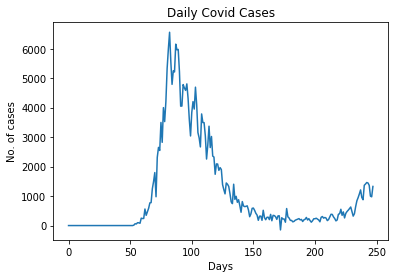

In [58]:
plt.plot(covid_df.new_cases);
plt.title("Daily Covid Cases");

plt.xlabel("Days")
plt.ylabel("No. of cases")

Text(0,0.5,'No. of cases')

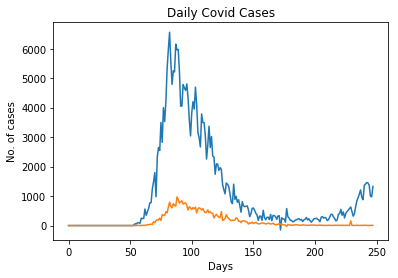

In [80]:
plt.plot(covid_df.new_cases);
plt.plot(covid_df.new_deaths);

plt.title("Daily Covid Cases");

plt.xlabel("Days")
plt.ylabel("No. of cases")

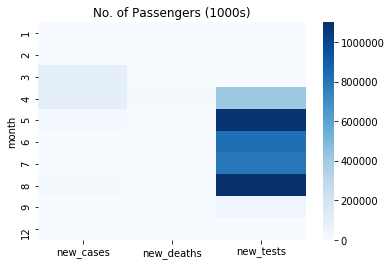

In [93]:
#heat  map
plt.title("No. of Passengers (1000s)")
sns.heatmap(covid_month_df, cmap='Blues');

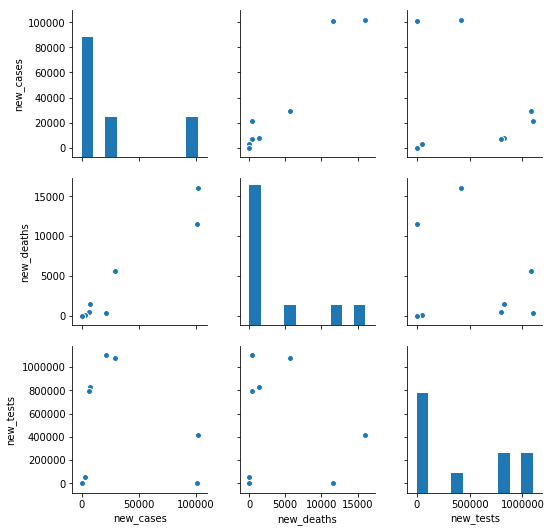

In [98]:
sns.pairplot(covid_month_df);

## References and Further Reading

Check out these references to learn and discover more:

* Pandas exercises: https://github.com/guipsamora/pandas_exercises
* User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Python for Data Analysis (book by Wes McKinney - creator of Pandas): https://www.oreilly.com/library/view/python-for-data/9781491957653/

* Data Visualization cheat sheet: https://jovian.ml/aakashns/dataviz-cheatsheet
* Seaborn gallery: https://seaborn.pydata.org/examples/index.html
* Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html
* Matplotlib tutorial: https://github.com/rougier/matplotlib-tutorial